In [2]:
import os
from datetime import timedelta
import pickle
import sys


# -----------
sys.path.append(os.path.abspath(".."))
# from utils.inputs import *
# from utils.outputs import *

from utils import (
    #validate_inputs,
    #load_species_params,
    #all_historical_model_run,
    #prediction_model_run,
    #fflies_output_class,
    #PredictionNeededError,
    fflies_spatial_wrapper,
    fflies_prediction,
)

# from utils.outputs import fflies_output_class

import pandas as pd

sys.path.append(os.path.abspath("../data"))

data_path = ""

In [ ]:
# lets test the core first
data_path = os.path.abspath(os.path.join("..", "")) #".." and "data"
cache_path = os.path.join(data_path, "cache_temp/pred_cache.pkl") #remove cache temp
print(cache_path)
if cache_path and os.path.exists(cache_path):
    with open(cache_path, "rb") as cache_file:
        raw_PRISM = pickle.load(cache_file)

tmin_xr = raw_PRISM["tmin"]
tmax_xr = raw_PRISM["tmax"]
tmax_single_sample = tmax_xr.isel(latitude=0, longitude=0)
tmin_single_sample = tmin_xr.isel(latitude=0, longitude=0)

start_day = 0
target_species = "off"
stages = load_species_params(target_species, os.path.abspath(os.path.join("..", "data")))
detection_date = pd.Timestamp(year=2022, month=8, day=3)
test_idx = raw_PRISM["t"].get_index("t").get_loc(detection_date)



recent_weather_test = fflies_spatial_wrapper(tmin_xr, tmax_xr, test_idx, stages, generations=3)

#write recent wrapper function to that runs prediction if recent fails to complete

# [] need to remove additional dimension in output
# [] need to figue out how to handle incomplete development with an error or something else?

/home/thom/Desktop/CIPM/FruitFlyPheno/cache_temp/pred_cache.pkl


In [150]:
recent_weather_test['incomplete_development'].any()

<xarray.DataArray 'incomplete_development' ()> Size: 1B
array(False)

In [ ]:
detection_date = pd.Timestamp(year=2025, month=1, day=3)
test_idx = raw_PRISM["t"].get_index("t").get_loc(detection_date)

predict_test = fflies_prediction(
    current_data=raw_PRISM.isel(t=slice(test_idx,None)),
    historical_data=raw_PRISM,
    stages=stages,
    detection_date=pd.Timestamp(year=2025, month=1, day=3),
    generations=3,
    start_year=2020,
    end_year=2024,
)

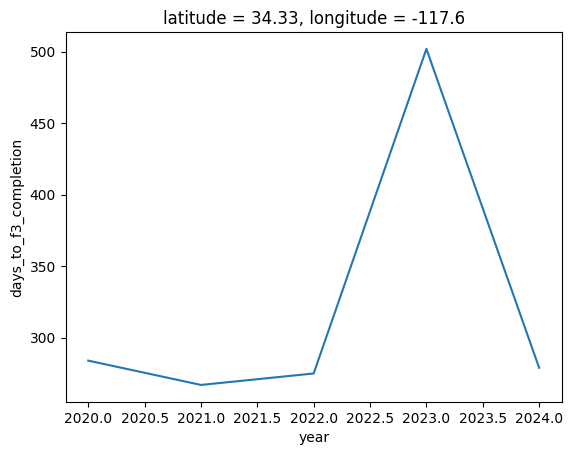

In [117]:
predict_test["days_to_f3_completion"].isel(latitude=14, longitude=1).plot()

In [114]:
540-380

160

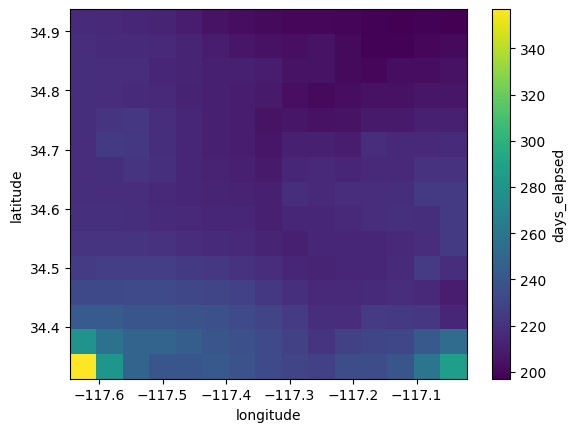

In [6]:
test['days_elapsed'].plot()

In [15]:
test_core

{'status': 'completed', 'days': 236, 'dd': np.float64(637.5014963150024)}

AttributeError: 'NoneType' object has no attribute 'keys'

In [ ]:
def run_plot_DD(
    start_dates,
    coordinates,
    target_species,
    historical_data_buffer=400,
    cache_path=os.path.join(data_path, "cache/pred_cache.pkl"),
    context_map=False,
    save_output=False,
    all_historical=None,
    force_prediction=False,
):
    """
    Generates a plot of completion dates for a given species at specified coordinates.

    Parameters:
    ----------
    start_dates : list of datetime
        List of start dates corresponding to each coordinate.
    coordinates : list of tuples (lat, lon)
        List of latitude and longitude pairs.
    target_species : str
        Name of the species to model.
    days_of_data : int
        Number of days of data to fetch - usually 180-200 is sufficient
    historical_data_buffer : int
        Number of days to buffer historical data for model run.
    cache_path : str
        Path to cache file for storing fetched data.
    context_map : bool
        If True, generates a context map for a single point.
    save_output : bool
        If True, saves the output data to a tiff file.
    Returns:
    -------
    matplotlib.figure.Figure
        A plot displaying degree-day completion for the given coordinates.

    Raises:
    ------
    ValueError:
        If the number of coordinates and dates do not match.
        If no coordinates are provided.
        If the start date is too early or the end date is in the future.
    """
    ###################
    ##Input Validation#
    ###################
    all_historical = validate_inputs(start_dates, coordinates, historical_data_buffer)

    # a bounding box if we have multiple points, a context map if we have a single point
    # loaded from .json file
    fly_params = load_species_params(target_species, data_path)

    # setup Modelvariables
    first_date = min(start_dates)
    last_date = max(start_dates) + timedelta(days=historical_data_buffer)
    n_days_data = (last_date - first_date).days

    ##########
    ##Model##
    ##########
    if all_historical:
        try:
            return all_historical_model_run(
                coordinates,
                start_dates,
                fly_params,
                n_days_data,
                cache_path,
                context_map,
            )
        except PredictionNeededError: #triggers if we assume we have all historical data but we actually need to predict
            all_historical = False
    if force_prediction or not all_historical:
        return prediction_model_run(
            coordinates,
            start_dates,
            fly_params,
            n_days_data,
            cache_path,
            produce_plot=False,
        )
        # predict

In [3]:
output = run_plot_DD(
    [pd.to_datetime("2025-01-01")],
    [(34.63115, -117.338321)],
    "Mexfly",
    context_map=False,
    cache_path=os.path.join(data_path, "cache/pred_cache.pkl"),
)

In [4]:
print(output)

fflies_output_class(finish_date_list=[237, 230, 230, 245, 231], figure=<Figure size 640x480 with 0 Axes>, value=None, array=<xarray.DataArray ()> Size: 8B
array(nan))


In [ ]:
run_plot_DD(
    [pd.to_datetime("2002-01-01")],
    [(34.63115, -117.338321)],
    "Mexfly",
    context_map=True,
    cache_path=os.path.join(data_path, "cache/cache[deleted].pkl"),
)

AttributeError: 'str' object has no attribute 'strptime'

In [ ]:
run_plot_DD(
    [pd.to_datetime("2002-01-01")],
    [(34.63115, -117.338321)],
    "Mexfly",
)

NameError: name 'run_plot_DD' is not defined

run_plot_DD(
    [pd.to_datetime("2002-01-01")],
    [(34.63115, -117.338321)],
    "Mexfly",
    context_map=False,
)
run_plot_DD(
    [pd.to_datetime("2002-01-01")],
    [(34.63115, -117.338321)],
    "Mexfly",
    context_map=True,
)
### Why is map not plotting?

In [ ]:
# test statements
"""
run_plot_DD(
    [pd.to_datetime("2002-01-01")],
    [(34.63115, -117.338321)],
    "Mexfly",


run_plot_DD(
    [pd.to_datetime("2002-01-01"), pd.to_datetime("2002-05-01")],
    [(34.63115, -117.338321), (34.68115, -117.336321)],
    "Mexfly",
)
"""

'\nrun_plot_DD(\n    [pd.to_datetime("2002-01-01")],\n    [(34.63115, -117.338321)],\n    "Mexfly",\n\n\nrun_plot_DD(\n    [pd.to_datetime("2002-01-01"), pd.to_datetime("2002-05-01")],\n    [(34.63115, -117.338321), (34.68115, -117.336321)],\n    "Mexfly",\n)\n'

In [ ]:
import os


# Parameters
start_date = "2020-01-01"
bbox = (-117.63832099999999, -117.038321, 34.33115, 34.931149999999995)
cache_path = "cache/pred_cache.pkl"

# Ensure the cache directory exists
os.makedirs(os.path.dirname(cache_path), exist_ok=True)

# Fetch the data
ncss_data = fetch_ncss_data(start_date=start_date, bbox=bbox)

# Save the data to the cache
with open(cache_path, "wb") as cache_file:
    pickle.dump(ncss_data, cache_file)

print(f"NCSS data saved to {cache_path}")

NCSS data saved to cache/pred_cache.pkl
